<a href="https://colab.research.google.com/github/sprasha09/BME450-EpilepticSeizureRecognition/blob/main/SeizureDetection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# ================================================
# Seizure Detection Final Project - BME 450
# By: Sanjana Prashanth and Arwa Neemuchwala
# ================================================

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout, BatchNormalization, Input
import warnings

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Define dataset path
# data = '/content/drive/MyDrive/BME450FinalProject/Epileptic Seizure Recognition.csv'  # Adjust to match downloaded dataset folder (Sanjana)
data = '/content/drive/MyDrive/bme 450 /Epileptic Seizure Recognition.csv'  # Adjust to match downloaded dataset folder (Arwa)
df = pd.read_csv(data)

# Displaying the dataset
df.head()

# Removing the Unamed Column (not needed for our analysis)
df.drop('Unnamed', axis=1, inplace=True)
df.isna().sum().sum()
df.duplicated().sum()
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [25]:
# Mapping out the classification defined in the data

class_lab = {

    5: 'eyes open',

    4: 'eyes closed',

    3: 'tumor region identified',

    2: 'EEG from tumor area',

    1: 'seizure activity'

}

df['y'] = df['y'].map(class_lab)

df['y'].head()

,y
0,eyes closed
1,seizure activity
2,eyes open
3,eyes open
4,eyes open


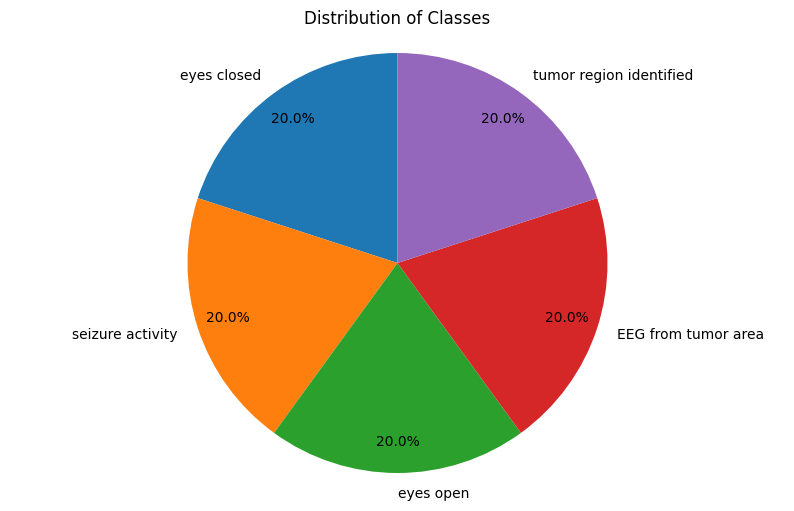

In [26]:
# Count the occurences of each class
value_counts = df['y'].value_counts()

# Create a pie chart using Matplotlib
plt.figure(figsize=(10,6))

plt.pie(
    value_counts,
    labels = value_counts.index,
    autopct = '%1.1f%%',
    startangle = 90,
    pctdistance = 0.85
)

# Add a title
plt.title('Distribution of Classes')

#Equal aspect ratio that ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

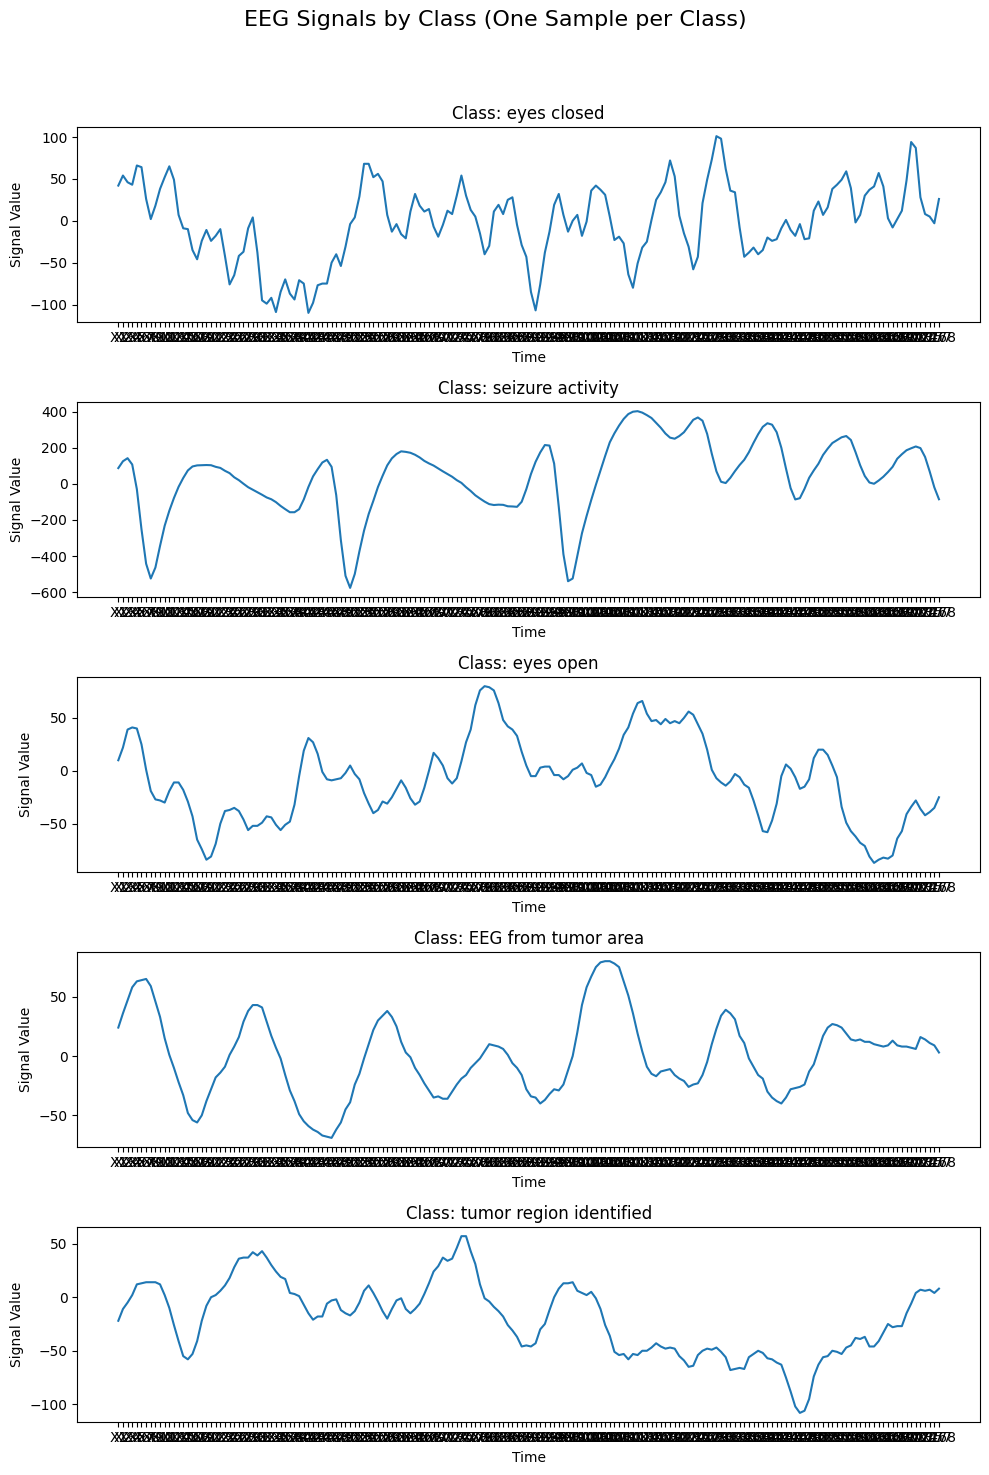

In [27]:
import matplotlib.pyplot as plt

unique_classes = df['y'].unique()

# Create subplots for each class with 1 column
fig, axes = plt.subplots(len(unique_classes), 1, figsize=(10, 3 * len(unique_classes)))
fig.suptitle('EEG Signals by Class (One Sample per Class)', fontsize = 16)

# Iterate over each class
for i, class_label in enumerate(unique_classes):

    # Filter the DataFrame for the current class
    class_data = df[df['y'] == class_label]

    # Select 1 random sample from the class
    random_sample = class_data.sample(n=1).drop(columns = 'y')

    # Plot the sample
    axes[i].plot(random_sample.iloc[0,:])
    axes[i].set_title(f'Class: {class_label}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Signal Value')

# Adjust layout and display the plot
plt.tight_layout(rect = [0, 0, 1, 0.95])
plt.show()

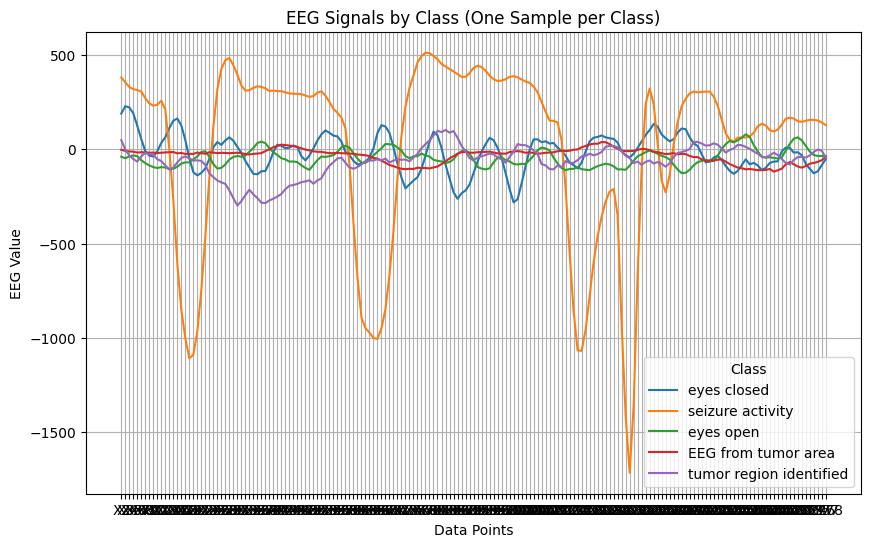

In [28]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10, 6))

unique_classes = df['y'].unique()

for label in unique_classes:
    class_data = df[df['y'] == label]
    sample_index = 0
    sample_data = class_data.iloc[sample_index]
    plt.plot(sample_data.index[1:-1], sample_data.values[1:-1], label = label)

plt.title('EEG Signals by Class (One Sample per Class)')
plt.xlabel('Data Points')
plt.ylabel('EEG Value')
plt.legend(title = 'Class')
plt.grid(True)

plt.show()

Epoch 1/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3797 - loss: 1.5090 - val_accuracy: 0.5913 - val_loss: 0.9444
Epoch 2/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5312 - loss: 1.0837 - val_accuracy: 0.5837 - val_loss: 0.8625
Epoch 3/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5664 - loss: 0.9542 - val_accuracy: 0.6168 - val_loss: 0.8232
Epoch 4/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5934 - loss: 0.8813 - val_accuracy: 0.6168 - val_loss: 0.8085
Epoch 5/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5964 - loss: 0.8863 - val_accuracy: 0.6380 - val_loss: 0.7892
Epoch 6/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6006 - loss: 0.8587 - val_accuracy: 0.6272 - val_loss: 0.7944
Epoch 7/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6119 - loss: 0.8413 - val_accuracy: 0.6321 - val_loss: 0.7874
Epoch 8/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6320 - loss: 0.8183 - val_accu

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 256)            │        45,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 270,481 (1.03 MB)

 Trainable params: 89,925 (351.27 KB)

 Non-trainable params: 704 (2.75 KB)

 Optimizer params: 179,852 (702.55 KB)

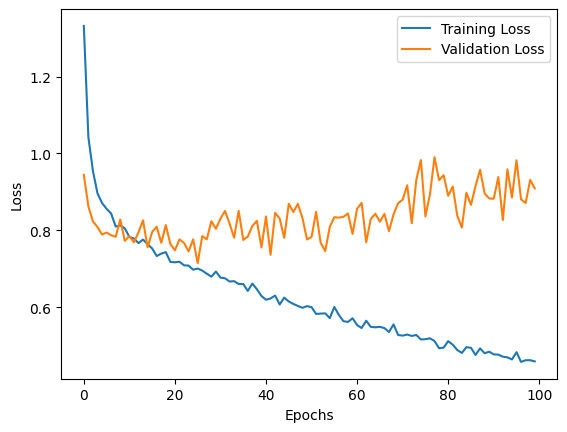

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


<Axes: >

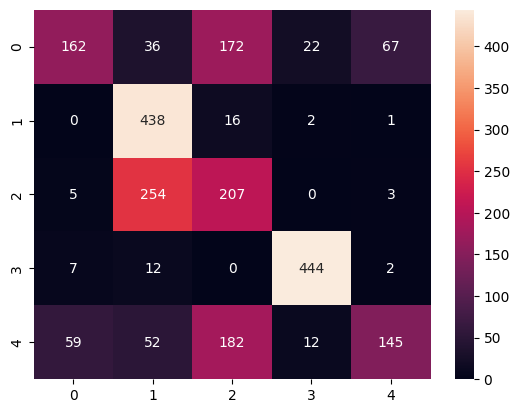

In [35]:
# Model 1: ANN
df1 = df.copy()

X = df1.drop('y', axis=1)
# Convert 'y' to numerical using Label Encoding before splitting
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df1['y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='elu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='elu'),
    Dense(64, activation='elu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='elu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(5, activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

model.summary()

# Plot the loss function
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot a Confusion Matrix
y_pred_probs = model.predict(X_test)  # Get predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Get class with highest probability

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

Epoch 1/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.2306 - loss: 1.9859 - val_accuracy: 0.3443 - val_loss: 1.5201
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.3039 - loss: 1.5719 - val_accuracy: 0.3539 - val_loss: 1.4304
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3394 - loss: 1.4732 - val_accuracy: 0.3939 - val_loss: 1.3689
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3758 - loss: 1.4162 - val_accuracy: 0.4065 - val_loss: 1.3311
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3924 - loss: 1.3769 - val_accuracy: 0.4113 - val_loss: 1.3184
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4075 - loss: 1.3311 - val_accuracy: 0.4265 - val_loss: 1.2930
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4149 - loss: 1.3132 - val_accuracy: 0.4452 - val_loss: 1.2724
Epoch 8/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4221 - loss: 1.2906 - val_a

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 1, 128)         │       157,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 1, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 1, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 659,313 (2.52 MB)

 Trainable params: 219,621 (857.89 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 439,244 (1.68 MB)

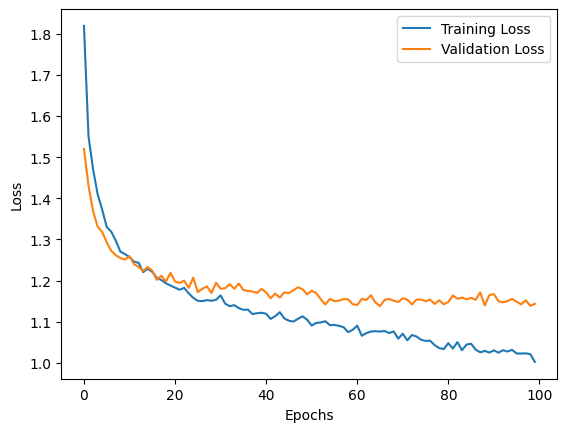

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


<Axes: >

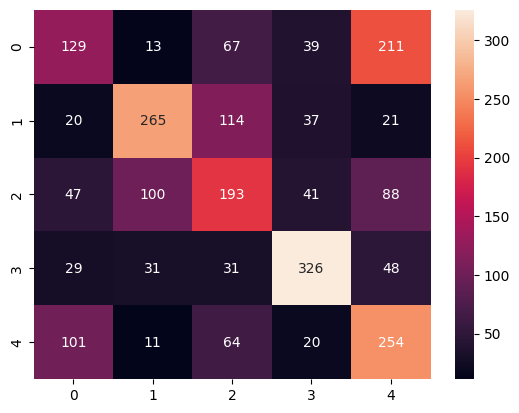

In [36]:
# Model 2: LSTM (corrected model)

# Convert X to numeric, if necessary
X = X.apply(pd.to_numeric, errors='coerce')

# Convert y to numeric and ensure it's a pandas Series
y = pd.Series(pd.to_numeric(y, errors='coerce'), name='y') # Convert y to Series

# Drop any rows with NaNs
df3 = pd.concat([X, y], axis=1).dropna()
X = df3.drop('y', axis=1)
y = df3['y']

# Drop any rows with NaNs
df3 = pd.concat([X, y], axis=1).dropna()
X = df3.drop('y', axis=1)
y = df3['y']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert and reshape to 3D
X_train = X_train.values.astype('float32').reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.astype('float32').reshape(X_test.shape[0], 1, X_test.shape[1])
y_train = y_train.values.astype('float32')
y_test = y_test.values.astype('float32')

# Build the model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # this should now work
    LSTM(128, return_sequences=True),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(32),
    BatchNormalization(),
    Dropout(0.2),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data = (X_test, y_test))

model.summary()

# Plot the loss function
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot a Confusion Matrix
y_pred_probs = model.predict(X_test)  # Get predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Get class with highest probability
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')